In [1]:
import arviz as az
from tms_risk.cogmodels.fit_probit import build_model, get_data
from tms_risk.cogmodels.utils import extract_intercept_gamma, format_bambi_ppc, plot_ppc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import os.path as op
sns.set_theme('paper', 'white', font='helvetica', font_scale=2, palette='tab10')

In [2]:
bids_folder = '/data/ds-tmsrisk'

stimulation_palette = sns.color_palette()[2:4]
stimulation_order = ['vertex', 'ips']

# Simple model

In [3]:
# model_label = 'probit_simple_model_session'
model_label = 'probit_simple'

In [92]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


: 

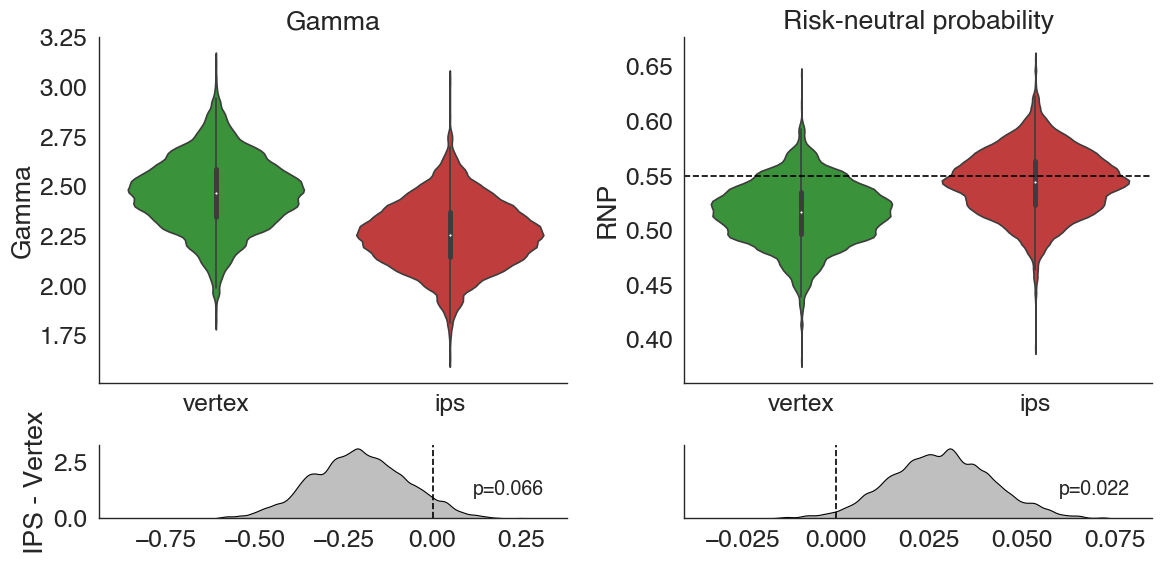

In [ ]:
fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((4, 2), (0, 0), rowspan=3)
sns.violinplot(data=gamma.reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
sns.despine()
ax0.set_xlabel(None)
ax0.set_ylabel('Gamma')


ax0.set_title('Gamma')

ax1 = plt.subplot2grid((4, 2), (3, 0))
gamma_delta = gamma.unstack('stimulation_condition')
gamma_delta = gamma_delta['ips'] - gamma_delta['vertex']
sns.kdeplot(gamma_delta, fill=True, color='k', ax=ax1)
ax1.set_title(None)
sns.despine()

ax1.set_xlabel(None)
ax1.set_ylabel('IPS - Vertex')

p = (gamma_delta > 0.0).mean()

ax1.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax1.transAxes)

ax1.axvline(0.0, c='k', ls='--')


ax2 = plt.subplot2grid((4, 2), (0, 1), rowspan=3)
sns.violinplot(data=rnp.reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax2)
sns.despine()
ax2.set_xlabel(None)
ax2.set_ylabel('RNP')
ax2.axhline(0.55, c='k', ls='--')

plt.tight_layout()

ax2.set_title('Risk-neutral probability')

ax3 = plt.subplot2grid((4, 2), (3, 1))

rnp_delta = rnp.unstack('stimulation_condition')
rnp_delta = rnp_delta['ips'] - rnp_delta['vertex']
sns.kdeplot(rnp_delta, color='k', fill=True, ax=ax3)

plt.axvline(0.0, c='k', ls='--')

sns.despine()


plt.ylabel(None)
plt.yticks([])
p = (rnp_delta < 0.0).mean()

ax3.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax3.transAxes)

plt.tight_layout()

plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_summary.pdf', bbox_inches='tight')
plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_summary.png', bbox_inches='tight')

In [ ]:
ppc = format_bambi_ppc(idata, model, data)

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:131: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:86: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


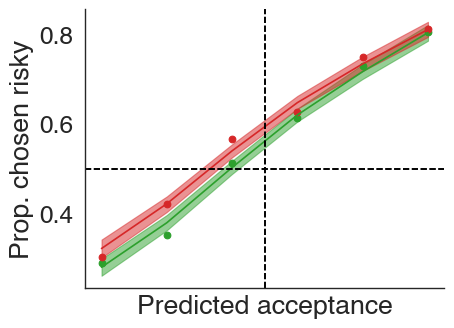

In [ ]:
g = plot_ppc(data, ppc, 0, level='group', legend=False, aspect=1.25, height=4, var_name='p')

# g.set(aspect=1.)
# g.fig.set_
# g.fig.set_size_inches(12, 12)
# g.fig.set_size_inches(5, 12)
g.set(xticks=[])

g.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_ppc.pdf')
g.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_ppc.png')

# Probit with order

In [4]:
model_label = 'probit_order'

In [5]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)

idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:250: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df.choice.isnull(), 'chose_risky'] = np.nan
/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:250: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df.choice.isnull(), 'chose_risky'] = np.nan
/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:273: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20

Dropping the baseline condition


In [6]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_42645/3067178552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_42645/3067178552.py:4: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method='silverman'`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/

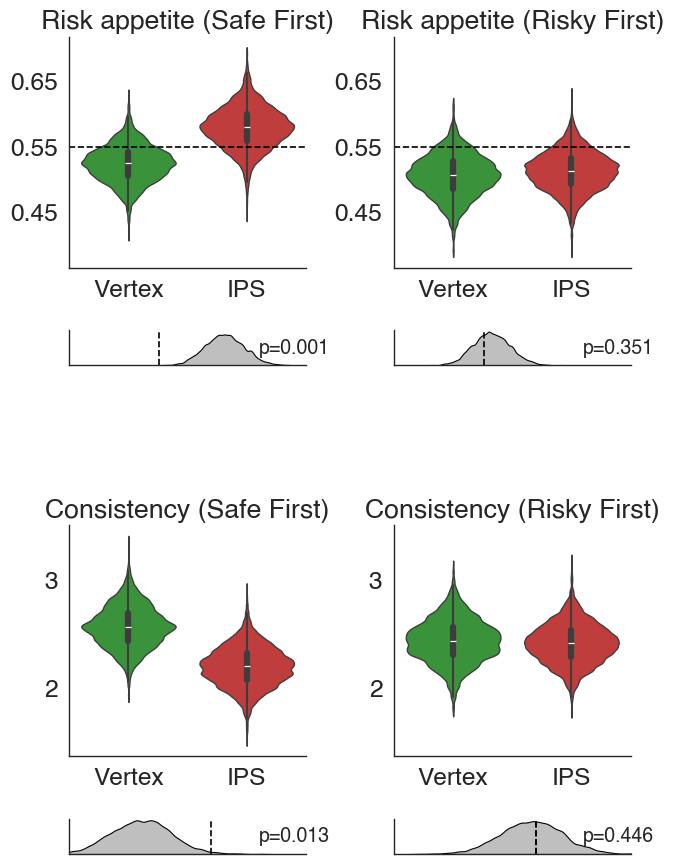

In [10]:
fig = plt.figure(figsize=(7, 10))

ax0 = plt.subplot2grid((10, 2), (5, 0), rowspan=3)
sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
sns.despine()
ax0.set_xlabel(None)
ax0.set_ylabel(None)
ax0.set_xticklabels(['Vertex', 'IPS'])
ax0.set_title('Consistency (Safe First)')

ax1 = plt.subplot2grid((10, 2), (5, 1), rowspan=3, sharey=ax0)
sns.violinplot(data=gamma.xs(True, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax1)
sns.despine()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_title('Consistency (Risky First)')
ax1.set_xticklabels(['Vertex', 'IPS'])

gamma_delta = gamma.unstack('stimulation_condition')

gamma_delta = gamma_delta['ips'] - gamma_delta['vertex']

ax2 = plt.subplot2grid((10, 2), (8, 0))
sns.kdeplot(gamma_delta.xs(False, 0, 'risky_first'), fill=True, color='k', ax=ax2)
sns.despine()

ax2.set_xlabel(None)

ax2.set_ylabel(None)
ax2.axvline(0.0, c='k', ls='--')
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_xlim(-0.75, 0.5)

p = (gamma_delta.xs(False, 0, "risky_first") > 0.0).mean()

ax2.text(0.8, 0.5, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax2.transAxes)


ax3 = plt.subplot2grid((10, 2), (8, 1), sharex=ax2, sharey=ax2)
ax3.axvline(0.0, c='k', ls='--')
sns.kdeplot(gamma_delta.xs(True, 0, 'risky_first'), fill=True, color='k', ax=ax3)
sns.despine()

ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticks([])

p = (gamma_delta.xs(True, 0, "risky_first") > 0.0).mean()

ax3.text(0.8, 0.5, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax3.transAxes)

ax3.axvline(0.0, c='k', ls='--')

ax4 = plt.subplot2grid((10, 2), (0, 0), rowspan=3)
sns.violinplot(data=rnp.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax4)
sns.despine()
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_title('Risk appetite (Safe First)')
ax4.axhline(0.55, c='k', ls='--')
ax4.set_xticklabels(['Vertex', 'IPS'])
ax4.set_yticks([0.35, 0.45, 0.55, 0.65, 0.75])

ax5 = plt.subplot2grid((10, 2), (0, 1), rowspan=3, sharey=ax4)
sns.violinplot(data=rnp.xs(True, 0, 'risky_first').reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax5)
sns.despine()
ax5.set_xlabel(None)
ax5.set_ylabel(None)
ax5.set_title('Risk appetite (Risky First)')
ax5.set_xticklabels(['Vertex', 'IPS'])
ax5.axhline(0.55, c='k', ls='--')


rnp_delta = rnp.unstack('stimulation_condition')
rnp_delta = rnp_delta['ips'] - rnp_delta['vertex']

ax6 = plt.subplot2grid((10, 2), (3, 0))
sns.kdeplot(rnp_delta.xs(False, 0, 'risky_first'), color='k', fill=True, ax=ax6)
ax6.set_xticks([])

p = (rnp_delta.xs(False, 0, "risky_first") < 0.0).mean()
ax6.text(0.8, 0.5, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax6.transAxes)

plt.axvline(0.0, c='k', ls='--')

ax6.set_ylabel(None)
ax6.set_yticks([])
sns.despine()



ax7 = plt.subplot2grid((10, 2), (3, 1), sharex=ax6, sharey=ax6)
sns.kdeplot(rnp_delta.xs(True, 0, 'risky_first'), color='k', fill=True, ax=ax7)

p = (rnp_delta.xs(True, 0, "risky_first") < 0.0).mean()
ax7.text(0.8, 0.5, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax7.transAxes)

ax7.set_ylabel(None)
ax7.set_yticks([])

plt.axvline(0.0, c='k', ls='--')

sns.despine()
plt.tight_layout()

plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_order_summary.pdf', bbox_inches='tight')
plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_order_summary.png', bbox_inches='tight')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_42645/2703766167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw=.5, axes=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_42645/2703766167.py:6: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  g = sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw=.5, axes=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_42

[Text(-1.0, 0, ''), Text(0.0, 0, '0.0'), Text(1.0, 0, '')]

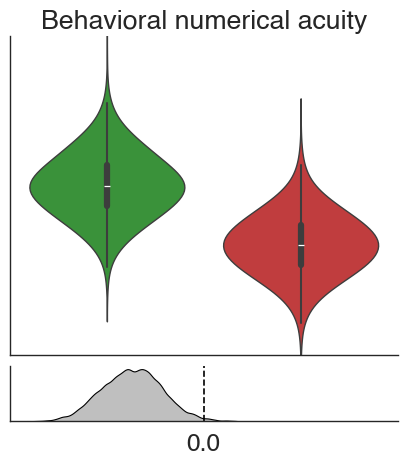

In [47]:
#

# fig, axes = plt.subplots(1, 2, figsize=(5, 6))

ax0 = plt.subplot2grid((6, 1), (0, 0), rowspan=5)
g = sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw=.5, axes=ax0)
sns.despine()
ax0.set_yticks([1., 2., 3.])
ax0.set_yticks([])
ax0.set_ylim(1.5, 3.5)
#Make sure the aspect ratio is 1
# g.set_aspect(1.)

g.figure.set_size_inches(5, 5)
g.set_xlabel(None)
g.set_ylabel(None)

g.set_xticklabels(['Vertex', 'IPS'])
g.set_title('Behavioral numerical acuity')


ax1 = plt.subplot2grid((6, 1), (5, 0), rowspan=5)
gamma_delta = gamma.unstack('stimulation_condition')
gamma_delta = gamma_delta['ips'] - gamma_delta['vertex']

sns.kdeplot(gamma_delta.xs(False, 0, 'risky_first'), fill=True, color='k', ax=ax1)
sns.despine()

ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_yticks([])
ax1.axvline(0.0, c='k', ls='--')
ax1.set_xlim(-1., 1.)
ax1.set_xticks([-1, 0.0, 1.])
ax1.set_xticklabels(['', 0.0, ''])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_42645/2822302940.py", line 1, in <module>
    g.axes.ravel()
AttributeError: 'Axes' object has no attribute 'ravel'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_trac

In [7]:
ppc = format_bambi_ppc(idata, model, data)

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:131: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:86: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


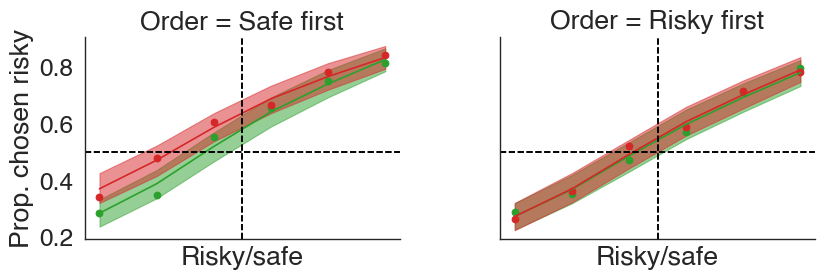

In [8]:
g = plot_ppc(data, ppc, 7, level='group', var_name='ll_bernoulli', legend=False)

g.fig.set_size_inches(10, 4)

g.set(xticks=[], xlabel='Risky/safe')
# g.set_xlabel('Risky/safe (a.u.)')

g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'probit_order_ppc.pdf'))

In [16]:
diff_risky_first = rnp.xs('ips', 0, 'stimulation_condition').xs(True, 0, 'risky_first') -  rnp.xs('vertex', 0, 'stimulation_condition').xs(True, 0, 'risky_first')
diff_safe_first = rnp.xs('ips', 0, 'stimulation_condition').xs(False, 0, 'risky_first') -  rnp.xs('vertex', 0, 'stimulation_condition').xs(False, 0, 'risky_first')


1- ((diff_risky_first - diff_safe_first) < 0.0).mean()



0.0020000000000000018

In [18]:
diff_risky_first = gamma.xs('ips', 0, 'stimulation_condition').xs(True, 0, 'risky_first') -  gamma.xs('vertex', 0, 'stimulation_condition').xs(True, 0, 'risky_first')
diff_safe_first = gamma.xs('ips', 0, 'stimulation_condition').xs(False, 0, 'risky_first') -  gamma.xs('vertex', 0, 'stimulation_condition').xs(False, 0, 'risky_first')


((diff_risky_first - diff_safe_first) < 0.0).mean()



0.03375

### Subjectwise

In [66]:
intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

In [67]:
rnp_ = rnp.groupby(['stimulation_condition', 'subject', 'risky_first', 'chain', 'draw']).mean()
gamma_ = gamma.groupby(['stimulation_condition', 'subject', 'risky_first', 'chain', 'draw']).mean()

In [68]:
mean_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).mean().to_frame('mean')
ci_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).apply(lambda x: pd.Series(az.hdi(x.values.ravel(), .95), index=pd.Index(['ci_min', 'ci_max']))).to_frame('value').unstack(-1)['value']

par_stats = mean_pars.join(ci_pars)

In [69]:
def plot_scatter_with_errors(data, xlabel='Vertex', ylabel='IPS', **kwargs):

    x = data[('mean', xlabel)]
    y = data[('mean', ylabel)] 

    xerr_min = x - data['ci_min', xlabel]
    xerr_max = data['ci_max', xlabel] - x

    yerr_min = y - data['ci_min', ylabel]
    yerr_max = data['ci_max', ylabel] - y


    plt.errorbar(x, y, [yerr_min, yerr_max], [xerr_min, xerr_max], fmt='.', markersize=0, alpha=0.5, **kwargs)
    plt.scatter(data[('mean', xlabel)], data[('mean', ylabel)], marker='.', s=50, **kwargs)

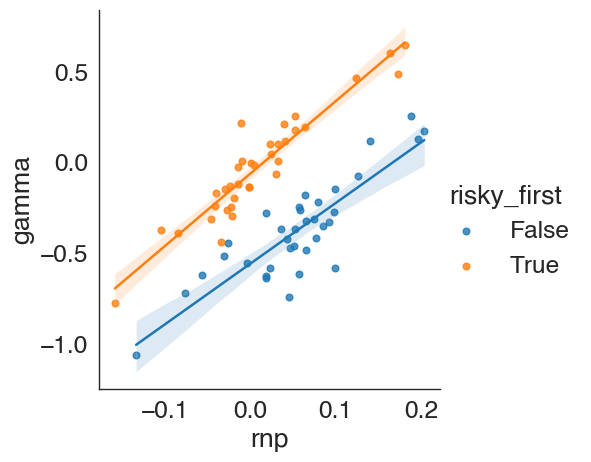

In [83]:
mean_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).mean().to_frame('mean')
ci_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).apply(lambda x: pd.Series(az.hdi(x.values.ravel(), .95), index=pd.Index(['ci_min', 'ci_max']))).to_frame('value').unstack(-1)['value']

rnp_stats = mean_pars.join(ci_pars)

mean_pars = gamma_.groupby(['stimulation_condition', 'subject', 'risky_first']).mean().to_frame('mean')
ci_pars = gamma_.groupby(['stimulation_condition', 'subject', 'risky_first']).apply(lambda x: pd.Series(az.hdi(x.values.ravel(), .95), index=pd.Index(['ci_min', 'ci_max']))).to_frame('value').unstack(-1)['value']

gamma_stats = mean_pars.join(ci_pars)


par_stats = pd.concat((rnp_stats, gamma_stats), axis=1, keys=['rnp', 'gamma'], names=['parameter']).xs('mean', 1, -1)


tmp = par_stats.unstack('stimulation_condition').swaplevel(axis=1)

diff = tmp['ips'] - tmp['vertex']


sns.lmplot(x='rnp', y='gamma', hue='risky_first', data=diff.reset_index())


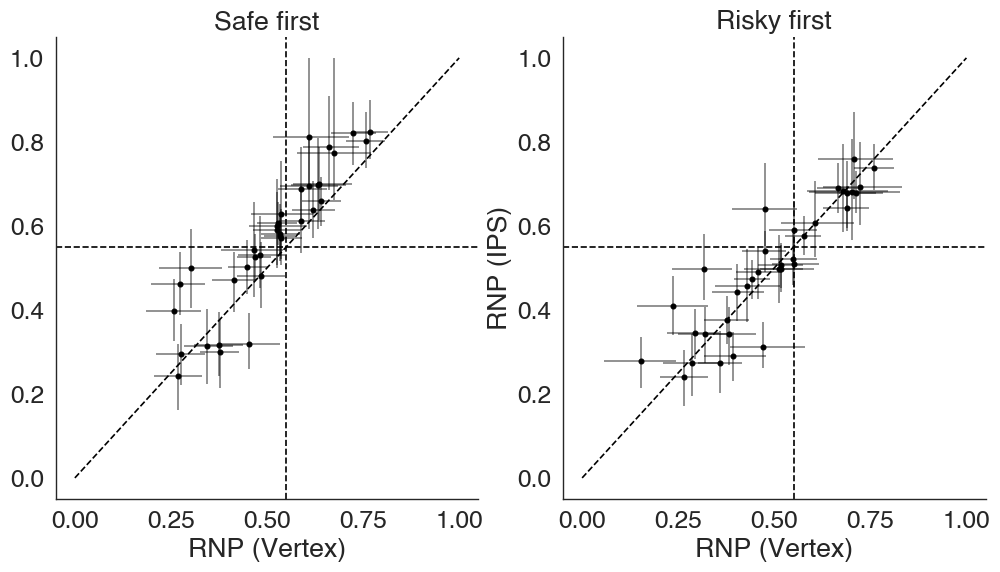

In [71]:
plt.gcf().set_size_inches(12, 6)
plt.subplot(122)
plt.title('Risky first')
plot_scatter_with_errors(par_stats.xs(True, 0, 'risky_first').unstack('stimulation_condition'), xlabel='vertex', ylabel='ips', color='k')
plt.plot([0,1], [0, 1], c='k', ls='--')
plt.axhline(0.55, c='k', ls='--')
plt.axvline(0.55, c='k', ls='--')
plt.xlabel('RNP (Vertex)')
plt.ylabel('RNP (IPS)')

plt.subplot(121)
plt.title('Safe first')
plot_scatter_with_errors(par_stats.xs(False, 0, 'risky_first').unstack('stimulation_condition'), xlabel='vertex', ylabel='ips', color='k')
plt.plot([0,1], [0, 1], c='k', ls='--')
plt.axhline(0.55, c='k', ls='--')
plt.axvline(0.55, c='k', ls='--')
plt.xlabel('RNP (Vertex)')
# plt.ylabel('RNP (IPS)')

sns.despine()

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'probit_order_rnp_subjectwise.pdf'))

In [64]:
par_stats

mean    ci_min    ci_max
stimulation_condition subject risky_first                              
ips                   1       False        0.525677  0.472046  0.579890
                              True         0.473703  0.427112  0.517985
                      2       False        0.629352  0.521485  0.754697
                              True         0.497747  0.416289  0.578519
                      3       False        0.575689  0.527204  0.625617
...                                             ...       ...       ...
vertex                69      True         0.721884  0.626115  0.832946
                      72      False        0.528932  0.473557  0.578444
                              True         0.474870  0.417049  0.531734
                      74      False        0.277246  0.211479  0.339226
                              True         0.320162  0.248480  0.387667

[140 rows x 3 columns]

# Subjectwise

In [55]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

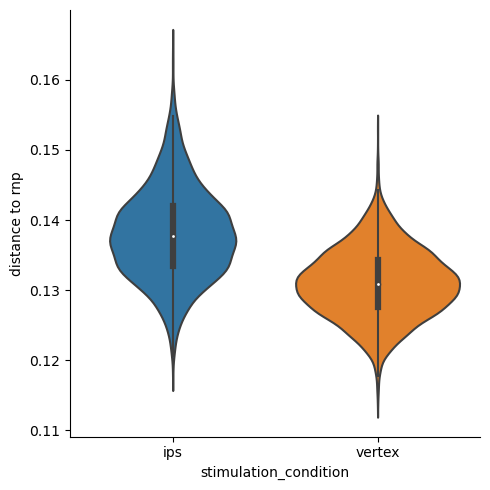

In [63]:
distance_to_rnp = rnp.groupby(['chain', 'draw', 'stimulation_condition']).apply(lambda d: (d - 0.55).abs().mean()).rename('distance to rnp')

sns.catplot(data=distance_to_rnp.reset_index(), x='stimulation_condition', y='distance to rnp', kind='violin')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_21324/4282490735.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)


0.82875

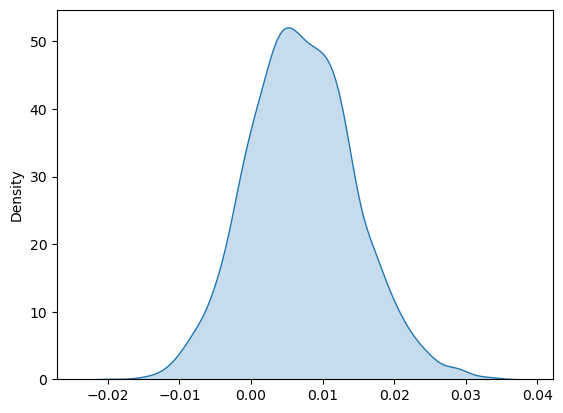

In [70]:
tmp = distance_to_rnp.unstack('stimulation_condition')
sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)

((tmp['ips'] - tmp['vertex']) > 0).mean()

# Probit simple half

In [3]:
model_label = 'probit_simple_half'

data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:66: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


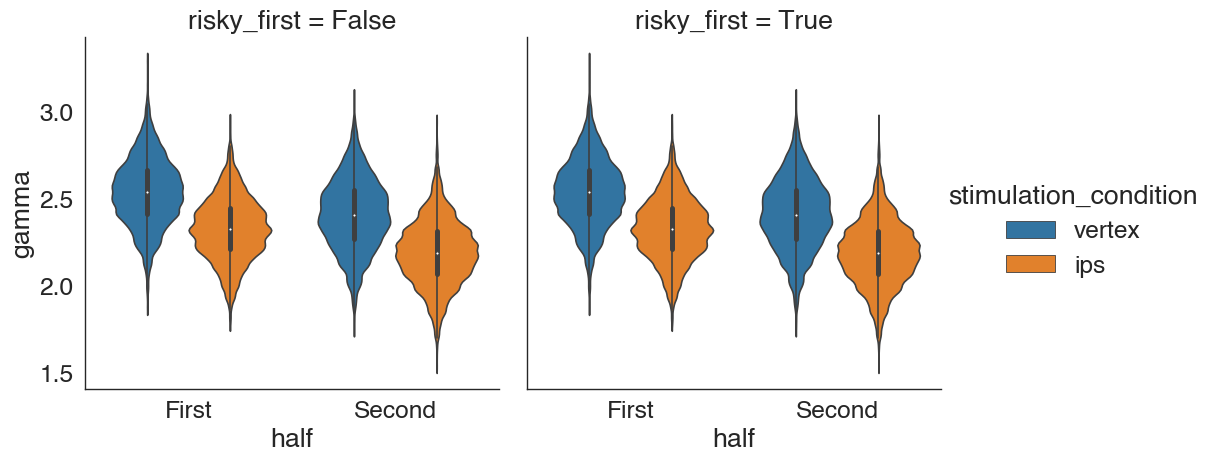

In [7]:
sns.catplot(gamma.reset_index(), x='half', y='gamma', hue='stimulation_condition', col='risky_first', kind='violin')

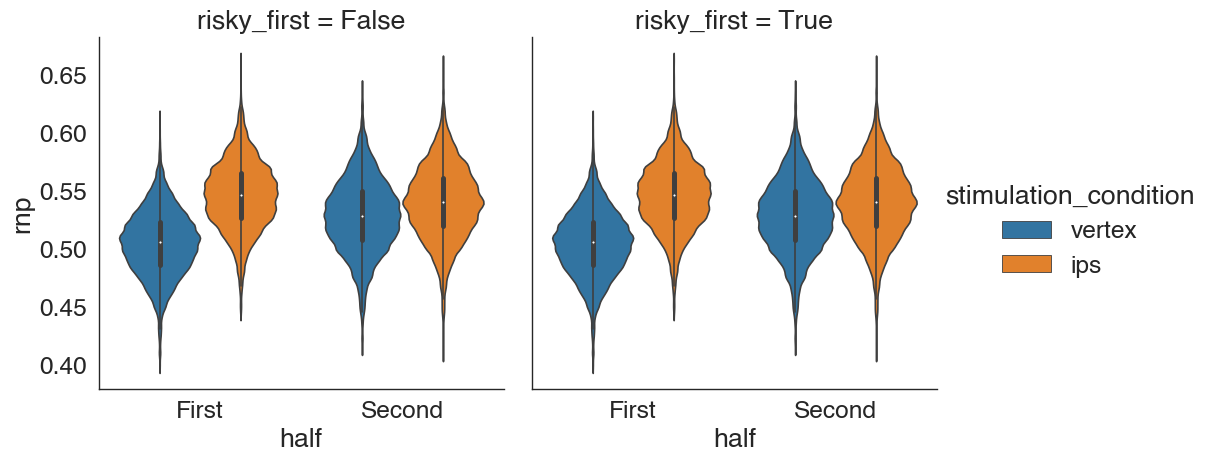

In [8]:
sns.catplot(rnp.reset_index(), x='half', y='rnp', hue='stimulation_condition', col='risky_first', kind='violin')

<Axes: ylabel='Density'>

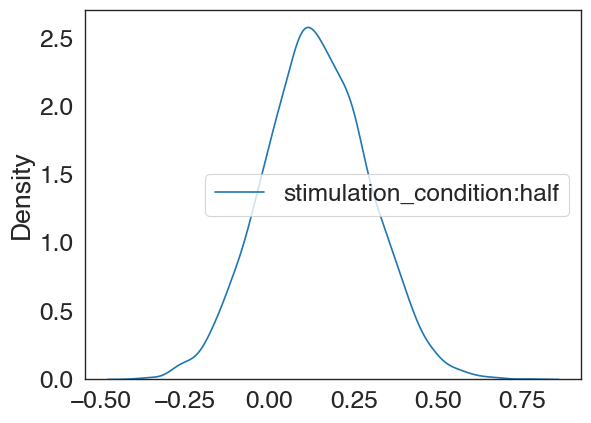

In [13]:
sns.kdeplot(idata.posterior['stimulation_condition:half'].to_dataframe())

<Axes: ylabel='Density'>

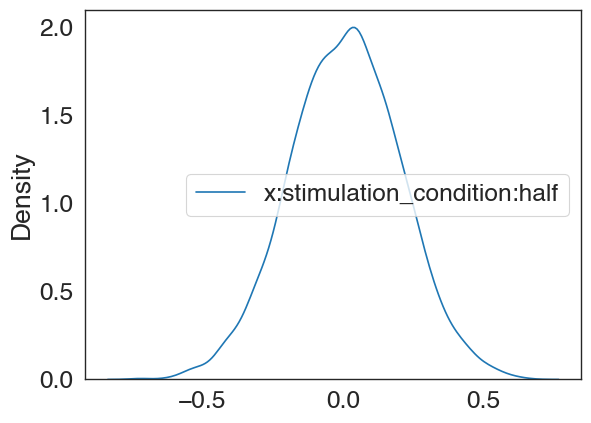

In [14]:
sns.kdeplot(idata.posterior['x:stimulation_condition:half'].to_dataframe())

# Probit order half

In [38]:
model_label = 'probit_order_half'


data = get_data(model_label, bids_folder)
model = build_model(model_label, data)

idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


In [39]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

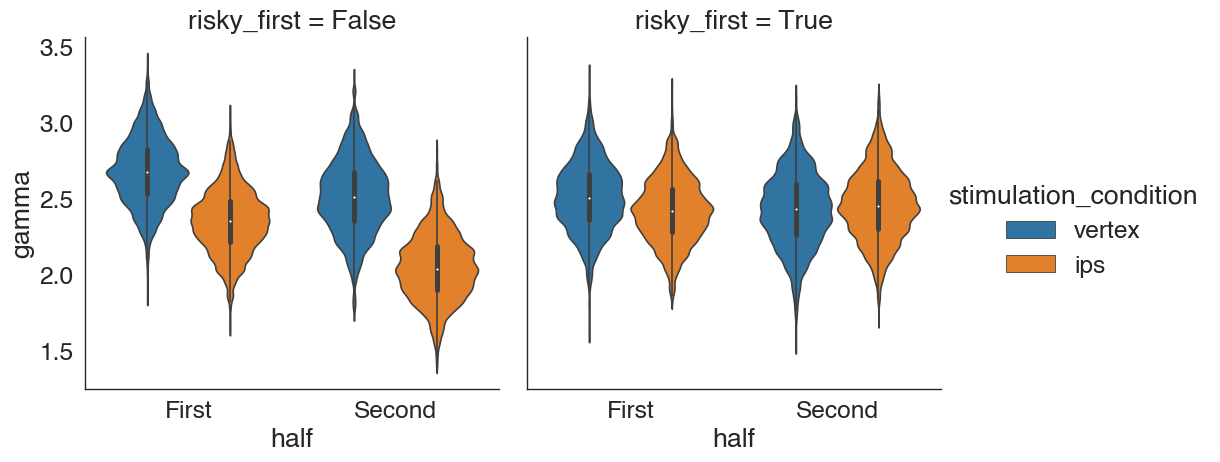

In [48]:
g = sns.catplot(x='half', hue='stimulation_condition', y='gamma', col='risky_first', data=gamma.reset_index(), kind='violin')

# g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

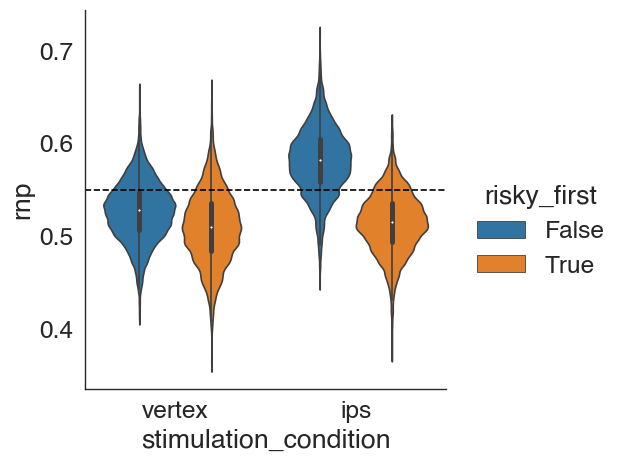

In [40]:
g = sns.catplot(x='stimulation_condition', y='rnp', hue='risky_first', data=rnp.reset_index(), kind='violin')

g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

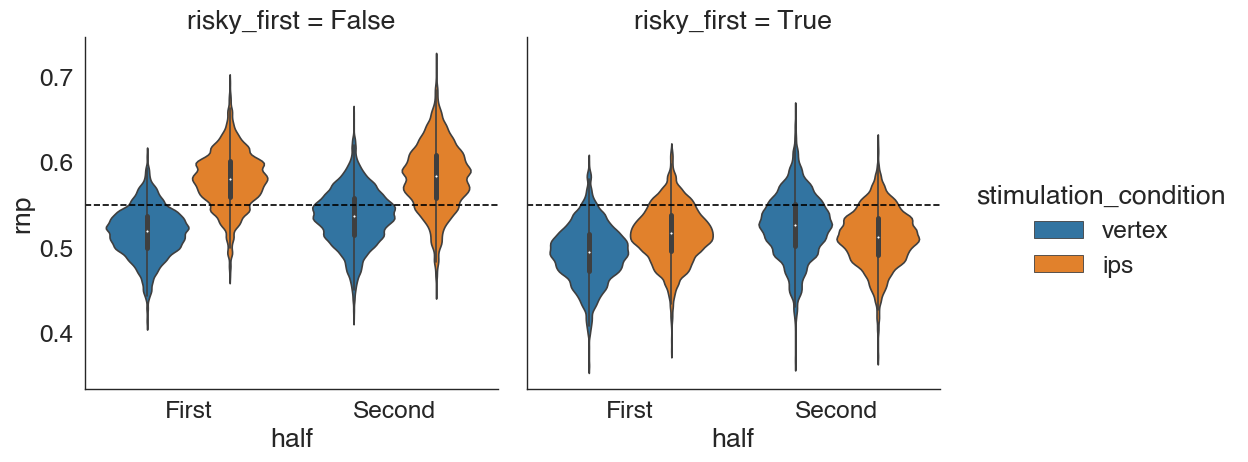

In [49]:
g = sns.catplot(x='half', hue='stimulation_condition', y='rnp', col='risky_first', data=rnp.reset_index(), kind='violin')

g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

In [53]:
data

stimulation_condition        rt    n1    n2  \
subject session run trial_nr                                               
1       2       1   1                       vertex  1.239692  28.0  86.0   
                    2                       vertex  0.836219   7.0  21.0   
                    3                       vertex  0.931371   7.0  21.0   
                    4                       vertex  1.135164  10.0  24.0   
                    5                       vertex  1.032161  20.0  44.0   
...                                            ...       ...   ...   ...   
74      3       6   116                     vertex  1.055890  37.0  20.0   
                    117                     vertex  0.739095  55.0  14.0   
                    118                     vertex  0.371731  22.0  20.0   
                    119                     vertex  0.705755  14.0  10.0   
                    120                     vertex  0.672241  15.0  14.0   

                                p1    p2  choice  risky_first  chose_risky  \
subject session run trial_nr                                                 
1       2       1   1         1.00  0.55     2.0        False         True   
                    2         1.00  0.55     2.0        False         True   
                    3         1.00  0.55     2.0        False         True   
                    4         1.00  0.55     1.0        False        False   
                    5         1.00  0.55     1.0        False        False   
...                            ...   ...     ...          ...          ...   
74      3       6   116       0.55  1.00     2.0         True        False   
                    117       0.55  1.00     2.0         True        False   
                    118       0.55  1.00     2.0         True        False   
                    119       0.55  1.00     2.0         True        False   
                    120       0.55  1.00     2.0         True        False   

                              n_risky  n_safe      frac  log(risky/safe)  \
subject session run trial_nr                                               
1       2       1   1            86.0    28.0  3.071429         1.122143   
                    2            21.0     7.0  3.000000         1.098612   
                    3            21.0     7.0  3.000000         1.098612   
                    4            24.0    10.0  2.400000         0.875469   
                    5            44.0    20.0  2.200000         0.788457   
...                               ...     ...       ...              ...   
74      3       6   116          37.0    20.0  1.850000         0.615186   
                    117          55.0    14.0  3.928571         1.368276   
                    118          22.0    20.0  1.100000         0.095310   
                    119          14.0    10.0  1.400000         0.336472   
                    120          15.0    14.0  1.071429         0.068993   

                               log(n1) bin(risky/safe)         x  session3  \
subject session run trial_nr                                                 
1       2       1   1         3.332205             80%  1.122143         0   
                    2         1.945910             80%  1.098612         0   
                    3         1.945910             80%  1.098612         0   
                    4         2.302585             44%  0.875469         0   
                    5         2.995732             44%  0.788457         0   
...                                ...             ...       ...       ...   
74      3       6   116       3.610918             44%  0.615186         1   
                    117       4.007333             80%  1.368276         1   
                    118       3.091042             20%  0.095310         1   
                    119       2.639057             32%  0.336472         1   
                    120       2.708050             20%  0.068993         1   

                     

0.7285

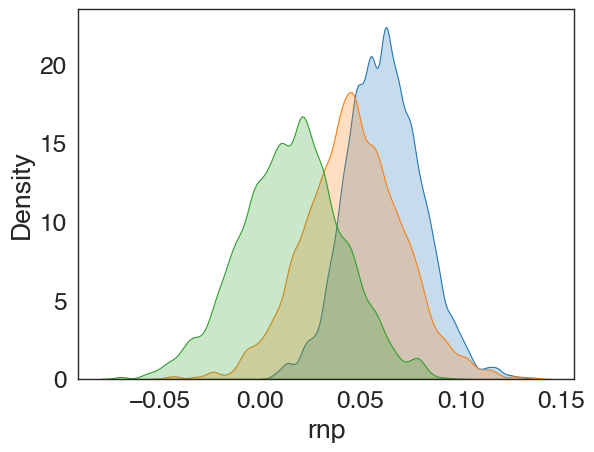

In [52]:
diff1 = rnp.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - rnp.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = rnp.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - rnp.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
sns.kdeplot(diff1, fill=True)
sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)

((diff1 - diff2) > 0).mean()

0.9435

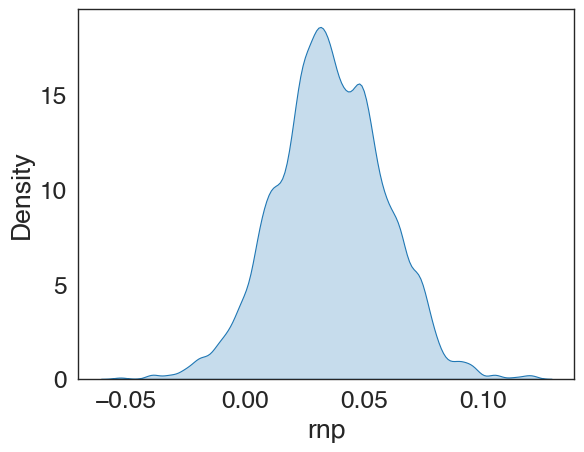

In [43]:
diff1 = rnp.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - rnp.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = rnp.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - rnp.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
# sns.kdeplot(diff1, fill=True)
# sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)
((diff1 - diff2) > 0).mean()

0.6925

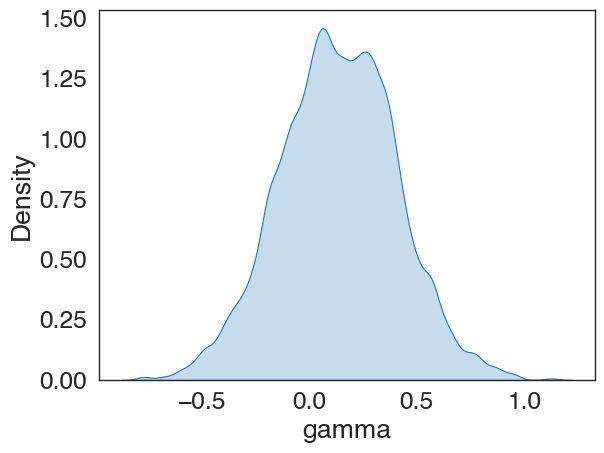

In [44]:
diff1 = gamma.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - gamma.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = gamma.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - gamma.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
# sns.kdeplot(diff1, fill=True)
# sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)

((diff1 - diff2) > 0).mean()

0.3345

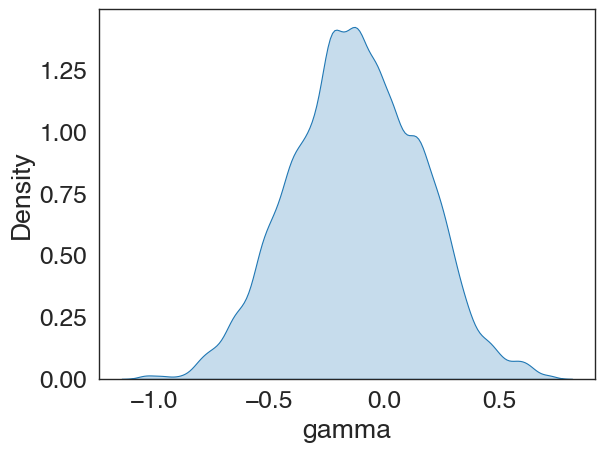

In [45]:
diff1 = gamma.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - gamma.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = gamma.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - gamma.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
# sns.kdeplot(diff1, fill=True)
# sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)

((diff1 - diff2) > 0).mean()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

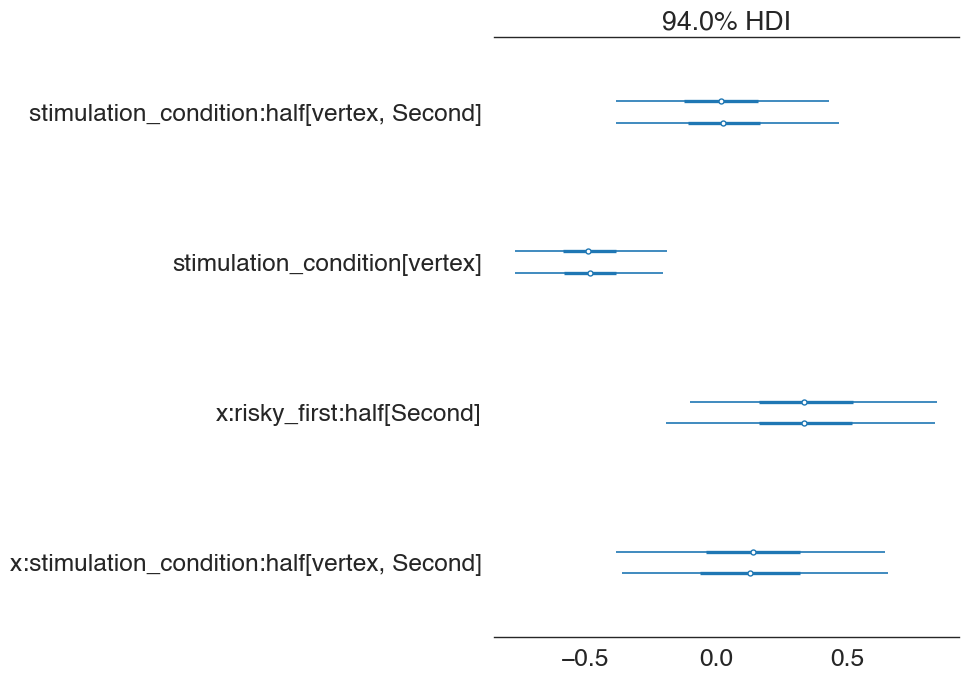

In [60]:
az.plot_forest(idata, var_names=['stimulation_condition:half', 'stimulation_condition', 'x:risky_first:half', 'x:stimulation_condition:half'])

# Full model

In [3]:
model_label = 'probit_full_model_session'

In [4]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:66: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


In [5]:
rnp = rnp.to_frame()
gamma = gamma.to_frame()


rnp.set_index(pd.Series(rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)
gamma.set_index(pd.Series(gamma.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)

In [ ]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', errorbar=get_ci, palette=['gray'], errwidth=3)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

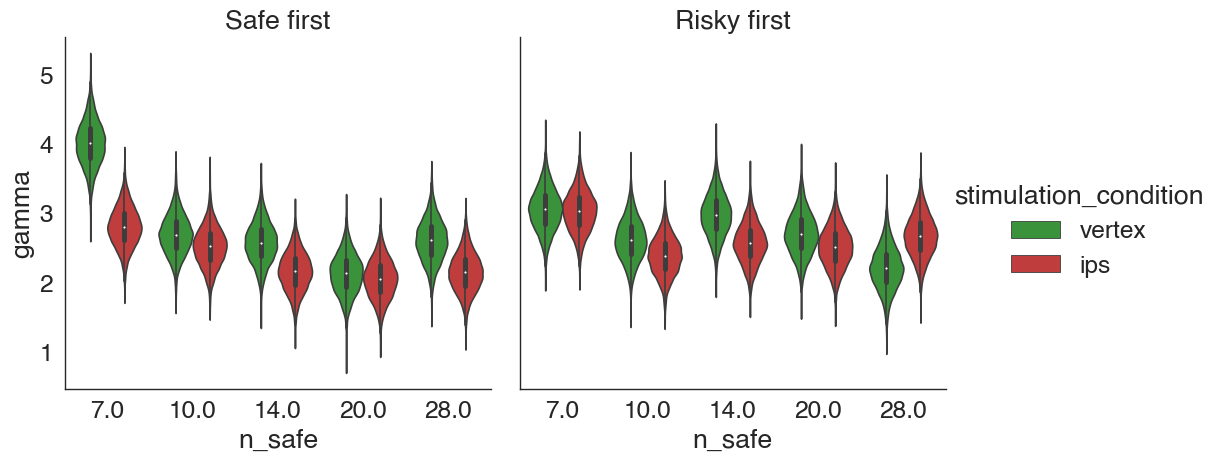

In [6]:
g = sns.catplot(data=gamma.reset_index(), x='n_safe', hue='stimulation_condition', y='gamma', col='Order', kind='violin', hue_order=stimulation_order, palette=stimulation_palette)
g.set_titles('{col_name}')

In [20]:
def get_ci(d):
    return az.hdi(d.values.ravel())

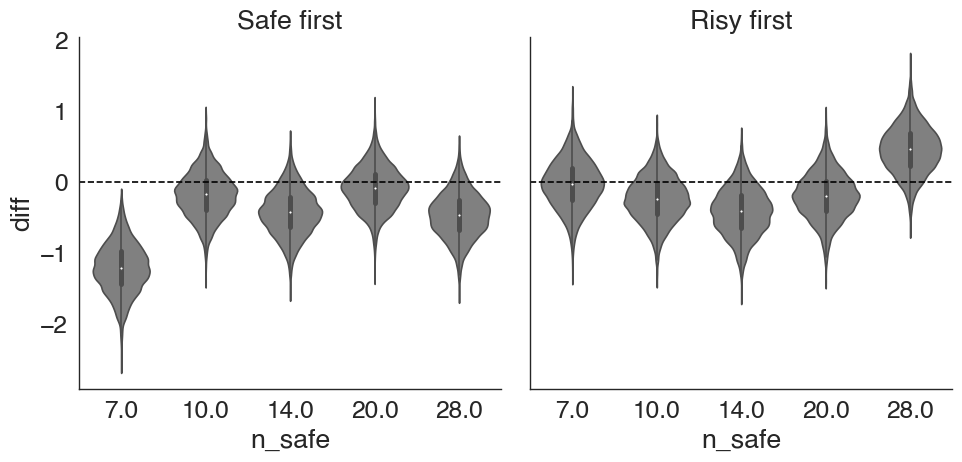

In [ ]:
tmp = gamma.unstack(['stimulation_condition'])['gamma']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

g.set_titles('{col_name}')

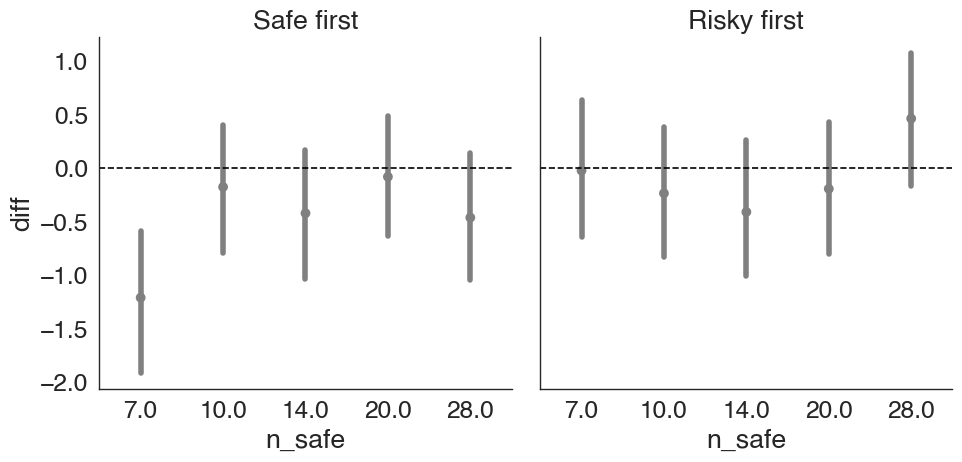

In [24]:
tmp = gamma.unstack(['stimulation_condition'])['gamma']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', palette=['gray'], errorbar=get_ci, errwidth=4)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

g.set_titles('{col_name}')

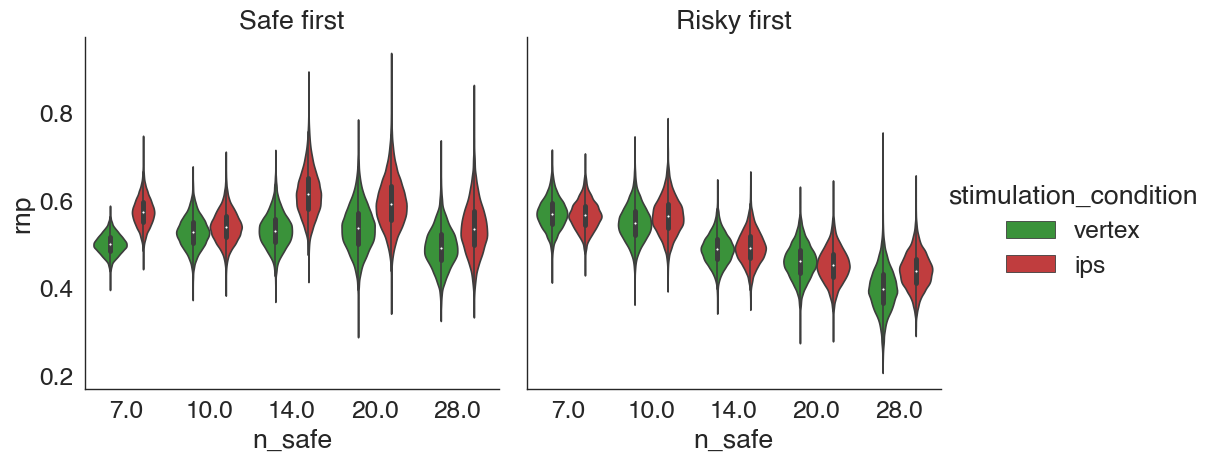

In [9]:
g = sns.catplot(data=rnp.reset_index(), x='n_safe', hue='stimulation_condition', y='rnp', col='Order', kind='violin', hue_order=stimulation_order, palette=stimulation_palette)
g.set_titles('{col_name}')

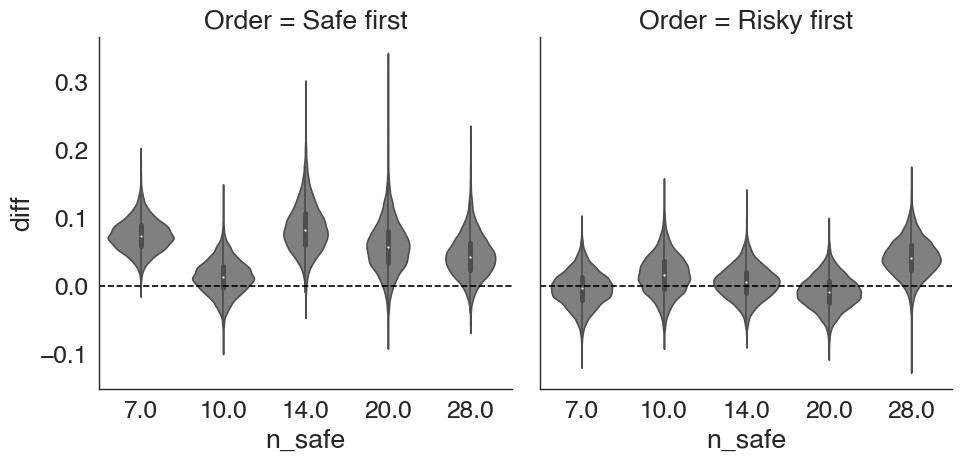

In [10]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

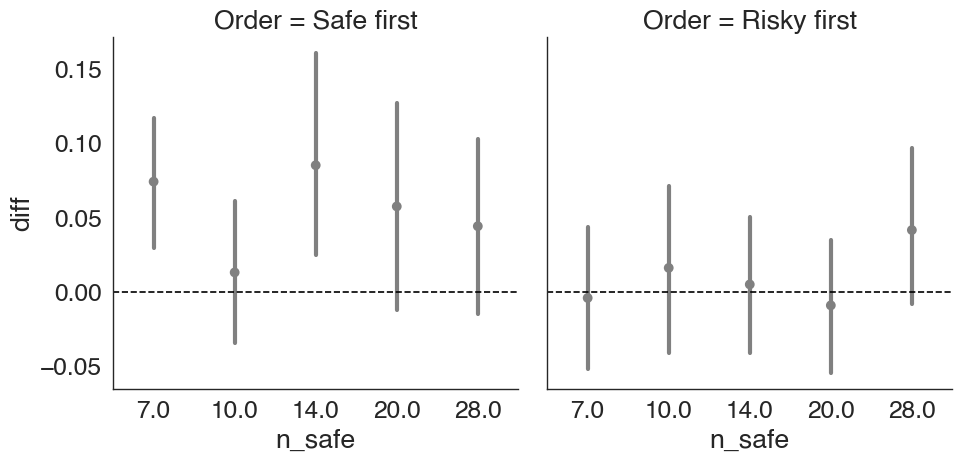

In [19]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', errorbar=get_ci, palette=['gray'], errwidth=3)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

## Subjectwise

In [7]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


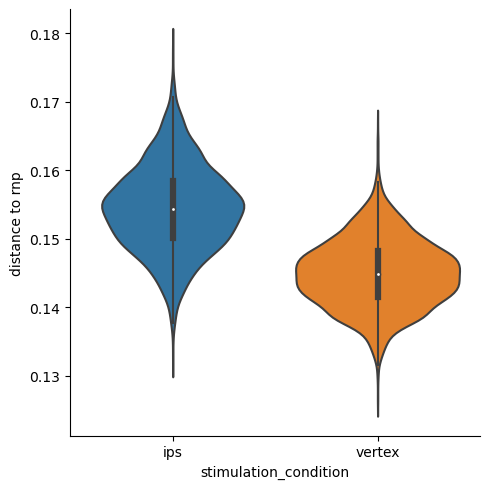

In [8]:
distance_to_rnp = rnp.groupby(['chain', 'draw', 'stimulation_condition']).apply(lambda d: (d - 0.55).abs().mean()).rename('distance to rnp')

sns.catplot(data=distance_to_rnp.reset_index(), x='stimulation_condition', y='distance to rnp', kind='violin')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_25884/4282490735.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)


0.90425

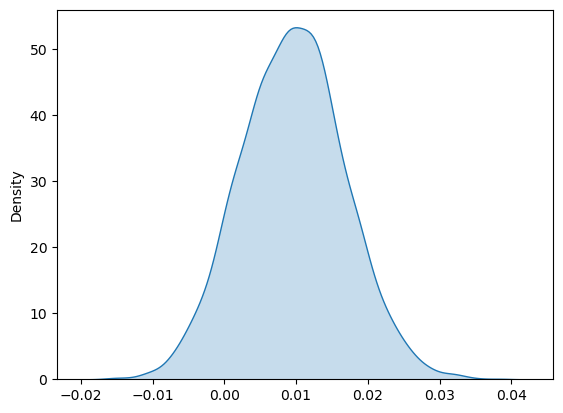

In [9]:
tmp = distance_to_rnp.unstack('stimulation_condition')
sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)

((tmp['ips'] - tmp['vertex']) > 0).mean()